In [4]:
# Automatic File Naming Utility
from output_util import OutputUtil

outputUtil = OutputUtil()

# Feature Engineering

 # Model

Features:
- population
- population density
- tax rates

Target Variable:
- total expenses per capita

[-130.77476656    0.17634271  -28.57529368    5.33668462]
-10565.820681684607
Mean Squared Error: 3926.983448067849


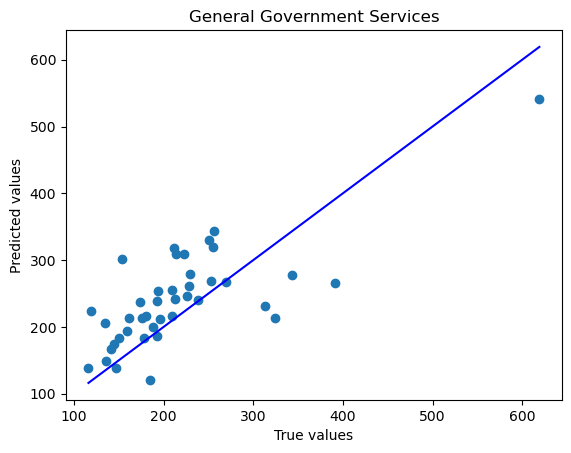

[109.89306726   0.18525184  25.9428691   -5.3500667 ]
10744.926003924014
Mean Squared Error: 8836.496580139266


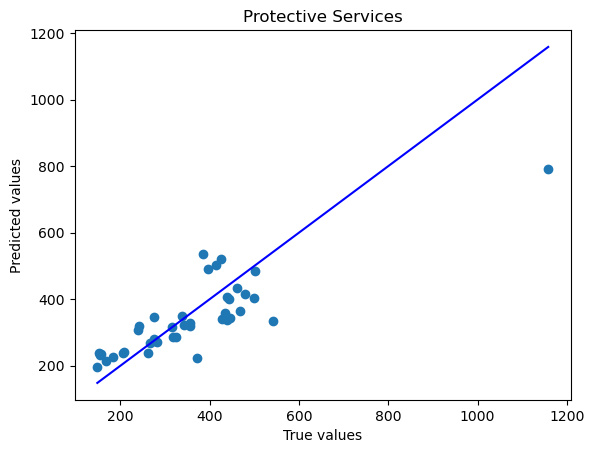

[ 1.56225288e+02  1.17850918e-01  5.63865513e+01 -9.46644152e+00]
18878.53478613803
Mean Squared Error: 5506.005881424397


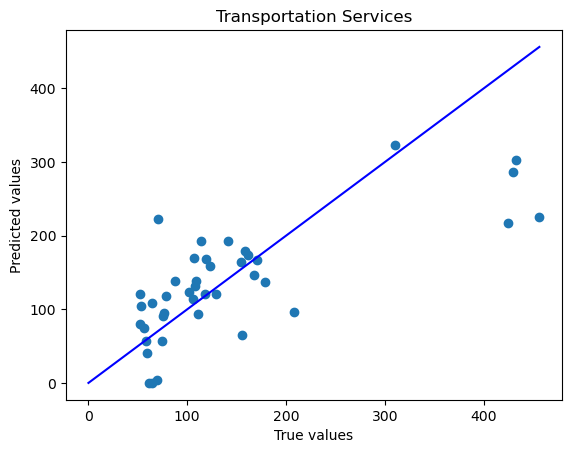

[-32.91851602   0.14501789 -35.38803368   4.02194425]
-8049.177705798076
Mean Squared Error: 3937.8164026476898


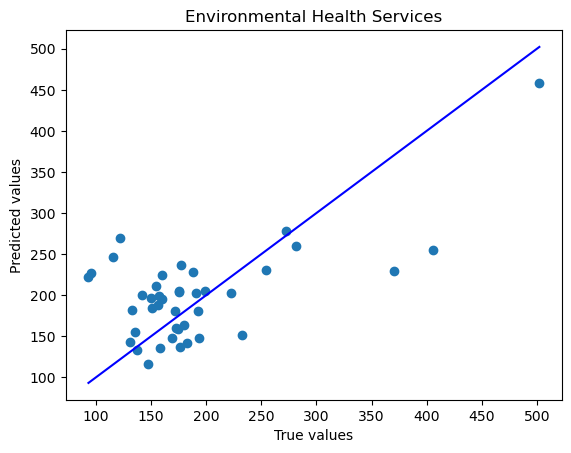

[ 1.28391690e+01  3.79277582e-03 -1.14773056e+01  8.92884224e-01]
-1810.523022436478
Mean Squared Error: 883.2596271800655


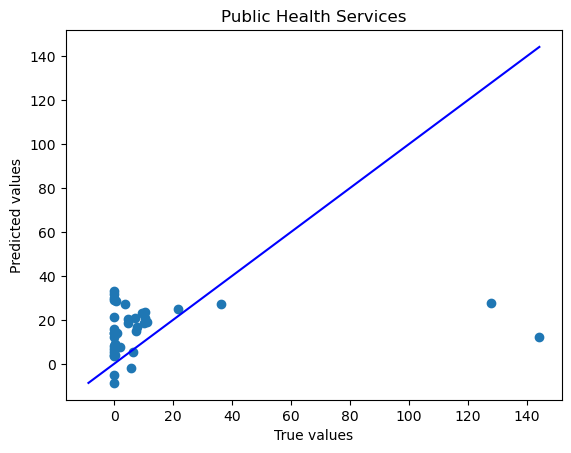

[-66.79129062   0.07494925 -10.67043364   2.84189542]
-5674.1352435310655
Mean Squared Error: 1757.4990371723657


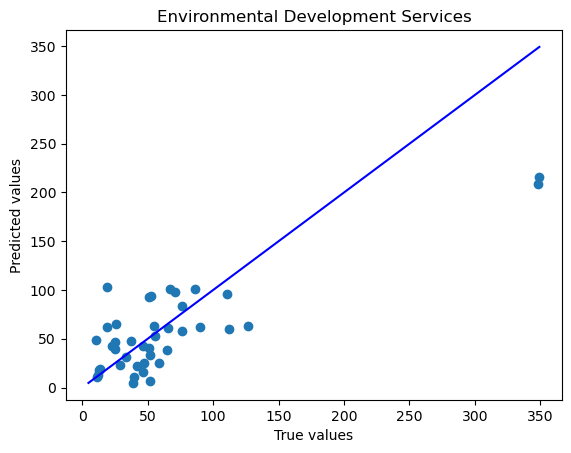

[32.63490977  0.09741766 14.94161188 -2.54033548]
5069.601004656853
Mean Squared Error: 694.2529781598579


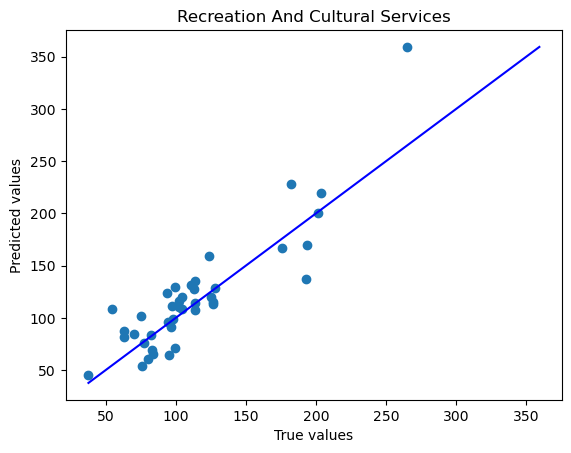

4229.050294202527

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Parse dates
features = [
    # "Population",
    # "Population Density",
    "Residential Tax Rates",
    # "Commercial Tax Rates",
    "Total Revenues_per_capita",
    "Population Change Percentage",
    "Year"
]
expenses_features = [
    "General Government Services",
    "Protective Services",
    "Transportation Services",
    "Environmental Health Services",
    "Public Health Services",
    "Environmental Development Services",
    "Recreation And Cultural Services",
]
# Load the data
data = pd.read_csv("../output/2-binning.csv")

models = {}
for expenses_feature in expenses_features:
    X = data[features]
    y = data[expenses_feature + "_per_capita"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    model = LinearRegression().fit(X_train, y_train)
    print(model.coef_)
    print(model.intercept_)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Visualize the results
    plt.scatter(y_test, y_pred)
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title(expenses_feature)
    plt.show()

    models[expenses_feature] = model

# predicting on total expenses per capita using all models
y_pred = sum([m.predict(data[features]) for m in models.values()])
mse = mean_squared_error(data["Total Expenses_per_capita"], y_pred)
mse

# Time Series Split

In [6]:
# # Train-test split (using TimeSeriesSplit)
# tscv = TimeSeriesSplit(n_splits=5)
# for train_index, test_index in tscv.split(data):
#     train_data, test_data = data.iloc[train_index], data.iloc[test_index]
#     print("TRAIN:", train_data, "TEST:", test_data)
